In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
pd.set_option("display.max_rows", 200) #parametre le nombre de ligne affichable dans dataframe pandas
pd.set_option("expand_frame_repr", True) #permet de deplier les colonnes cachées
pd.set_option("display.max_columns",200 ) #permet d'afficher jusqu'à 200 colonnes dans une cellule
pd.set_option('max_colwidth', None)

### Import data et Analyse

In [3]:
df_building_NRJ_Bench = pd.read_csv('2016_Building_Energy_Benchmarking.csv',
                                    index_col='OSEBuildingID', 
                                    dtype={'ZipCode':str,
                                          'CouncilDistrictCode':str})

In [4]:
df_building_NRJ_Bench.head()

DataYear    BuildingType PrimaryPropertyType  \
OSEBuildingID                                                 
1                  2016  NonResidential               Hotel   
2                  2016  NonResidential               Hotel   
3                  2016  NonResidential               Hotel   
5                  2016  NonResidential               Hotel   
8                  2016  NonResidential               Hotel   

                              PropertyName          Address     City State  \
OSEBuildingID                                                                
1                     Mayflower park hotel    405 Olive way  Seattle    WA   
2                          Paramount Hotel  724 Pine street  Seattle    WA   
3                  5673-The Westin Seattle  1900 5th Avenue  Seattle    WA   
5                                HOTEL MAX   620 STEWART ST  Seattle    WA   
8              WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA   

              ZipCode TaxParcelIdentificationNumber CouncilDistrictCode  \
OSEBuildingID                                                             
1               98101                    0659000030                   7   
2               98101                    0659000220                   7   
3               98101                    0659000475                   7   
5               98101                    0659000640                   7   
8               98121                    0659000970                   7   

              Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
OSEBuildingID                                                                   
1                 DOWNTOWN  47.61220 -122.33799       1927                1.0   
2                 DOWNTOWN  47.61317 -122.33393       1996                1.0   
3                 DOWNTOWN  47.61393 -122.33810       1969                1.0   
5                 DOWNTOWN  47.61412 -122.33664       1926                1.0   
8                 DOWNTOWN  47.61375 -122.34047       1980                1.0   

               NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
OSEBuildingID                                                         
1                          12             88434                   0   
2                          11            103566               15064   
3                          41            956110              196718   
5                          10             61320                   0   
8                          18            175580               62000   

               PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
OSEBuildingID                                                          
1                               88434                          Hotel   
2                               88502     Hotel, Parking, Restaurant   
3                              759392                          Hotel   
5                               61320                          Hotel   
8                              113580  Hotel, Parking, Swimming Pool   

              LargestPropertyUseType  LargestPropertyUseTypeGFA  \
OSEBuildingID                                                     
1                              Hotel                    88434.0   
2                              Hotel                    83880.0   
3                              Hotel                   756493.0   
5                              Hotel                    61320.0   
8                              Hotel                   123445.0   

              SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                                                 
1                                      NaN                              NaN   
2                                  Parking                          15064.0   
3                                      NaN                              NaN   
5                                      NaN                      

In [5]:
df_building_NRJ_Bench.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 1 to 50226
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         3376 non-null   int64  
 1   BuildingType                     3376 non-null   object 
 2   PrimaryPropertyType              3376 non-null   object 
 3   PropertyName                     3376 non-null   object 
 4   Address                          3376 non-null   object 
 5   City                             3376 non-null   object 
 6   State                            3376 non-null   object 
 7   ZipCode                          3360 non-null   object 
 8   TaxParcelIdentificationNumber    3376 non-null   object 
 9   CouncilDistrictCode              3376 non-null   object 
 10  Neighborhood                     3376 non-null   object 
 11  Latitude                         3376 non-null   float64
 12  Longitude          

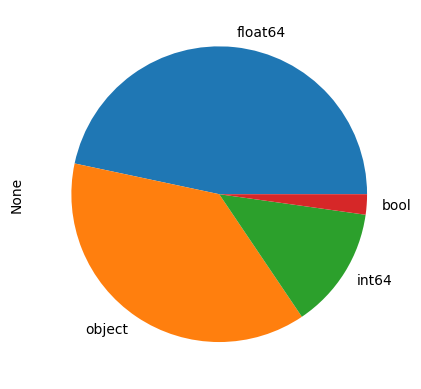

In [6]:
%matplotlib inline
df_building_NRJ_Bench.dtypes.value_counts().plot(kind='pie');

### Analyse des données manquantes et des doublons 

In [7]:
df_building_NRJ_Bench.duplicated().sum()

0

 0 doublons

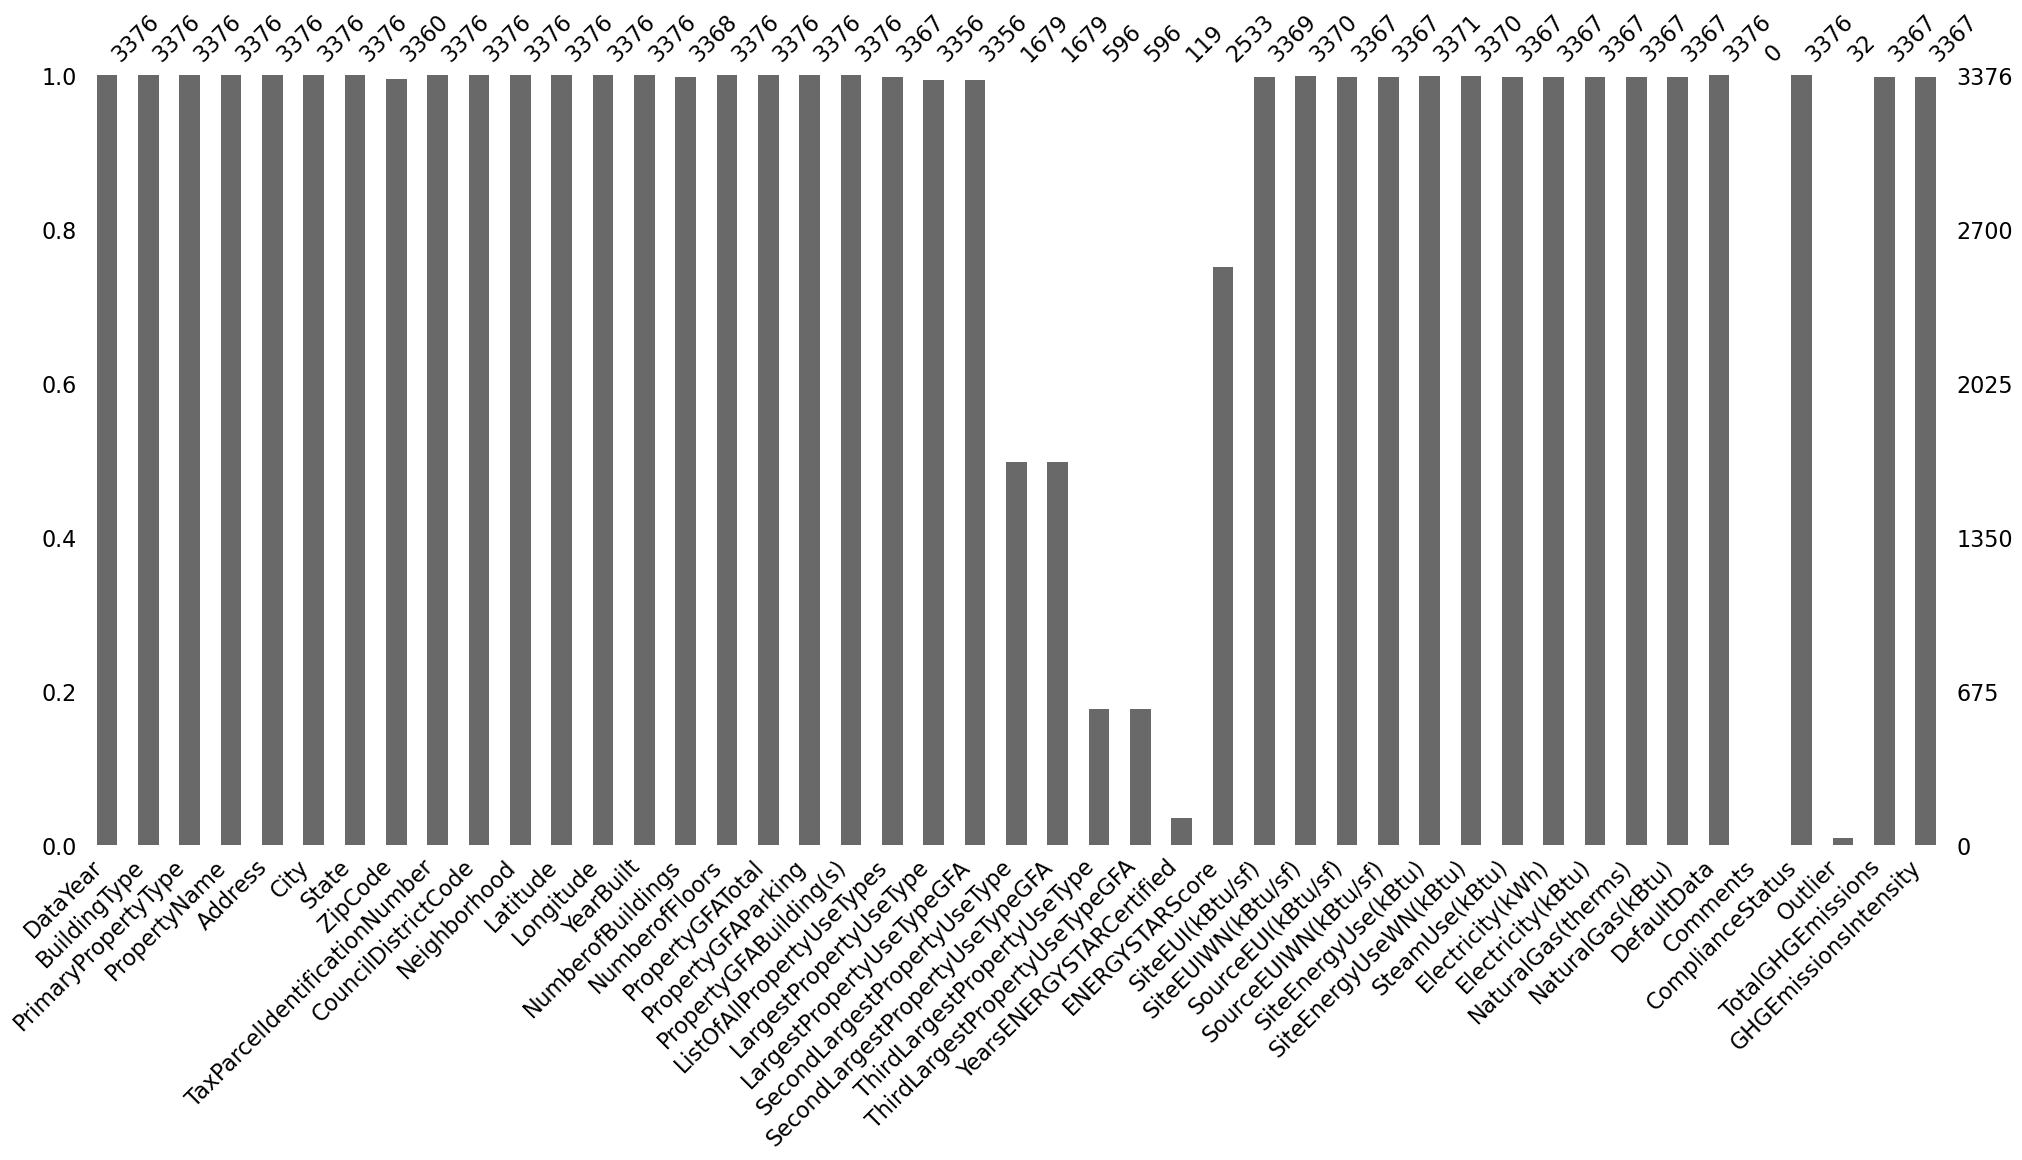

In [8]:
#les variables misc_data
import missingno as msno
msno.bar(df_building_NRJ_Bench);

In [9]:
df_building_NRJ_Bench\
.drop(inplace=True,
      columns=['Outlier','Comments','YearsENERGYSTARCertified','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'])

</br>

### Analyse des données numeriques

#### Describes

In [10]:
df_building_NRJ_Bench.describe()

DataYear     Latitude    Longitude    YearBuilt  NumberofBuildings  \
count    3376.0  3376.000000  3376.000000  3376.000000        3368.000000   
mean     2016.0    47.624033  -122.334795  1968.573164           1.106888   
std         0.0     0.047758     0.027203    33.088156           2.108402   
min      2016.0    47.499170  -122.414250  1900.000000           0.000000   
25%      2016.0    47.599860  -122.350662  1948.000000           1.000000   
50%      2016.0    47.618675  -122.332495  1975.000000           1.000000   
75%      2016.0    47.657115  -122.319407  1997.000000           1.000000   
max      2016.0    47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
count            3.376000e+03               3.356000e+03      2533.000000   
mean             8.683201e+04               7.917764e+04        67.918674   
std              2.079398e+05               2.017034e+05        26.873271   
min              3.636000e+03               5.656000e+03         1.000000   
25%              2.775600e+04               2.509475e+04        53.000000   
50%              4.321600e+04               3.989400e+04        75.000000   
75%              8.427625e+04               7.620025e+04        90.000000   
max              9.320156e+06               9.320156e+06       100.000000   

       SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
count       3369.000000         3370.000000         3367.000000   
mean          54.732116           57.033798          134.232848   
std           56.273124           57.163330          139.287554   
min            0.000000            0.000000            0.000000   
25%           27.900000           29.400000           74.699997   
50%           38.599998           40.900002           96.199997   
75%           60.400002           64.275002          143.899994   
max          834.400024          834.400024         2620.000000   

       SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
count           3367.000000         3.371000e+03           3.370000e+03   
mean             137.783932         5.403667e+06           5.276726e+06   
std              139.109807         2.161063e+07           1.593879e+07   
min               -2.100000         0.000000e+00           0.000000e+00   
25%               78.400002         9.251286e+05           9.701822e+05   
50%              101.099998         1.803753e+06           1.904452e+06   
75%              148.349998         4.222455e+06           4.381429e+06   
max             2620.000000         8.739237e+08           4.716139e+08   

       SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  \
count    3.367000e+03      3.367000e+03       3.367000e+03   
mean     2.745959e+05      1.086639e+06       3.707612e+06   
std      3.912173e+06      4.352478e+06       1.485066e+07   
min      0.000000e+00     -3.382680e+04      -1.154170e+05   
25%      0.000000e+00      1.874229e+05       6.394870e+05   
50%      0.000000e+00      3.451299e+05       1.177583e+06   
75%      0.000000e+00      8.293178e+05       2.829632e+06   
max      1.349435e+08      1.925775e+08       6.570744e+08   

       NaturalGas(therms)  NaturalGas(kBtu)  TotalGHGEmissions  \
count        3.367000e+03      3.367000e+03        3367.000000   
mean         1.368505e+04      1.368505e+06         119.723971   
std          6

In [11]:
# La variable dataYear est toujours égale à 2016, on va la supprimer
# Comments sera supprimé

In [12]:
df_building_NRJ_Bench.drop(columns=['DataYear'],inplace=True)
df_building_NRJ_Bench.shape

(3376, 37)

</br>

### Corrélation

In [13]:
df_building_NRJ_Bench.corr().style.background_gradient(cmap='Blues')

Il y a beaucoups de données corrélées.
Simplement car certaines colonnes sont justes des conversion d'autres colonnes en une autre unité. 
Ex: 1kWh = 1kBtu
suppression une à une

In [14]:
import scipy
def compute_corr(df):
    """
    Calcul la corrélation entre les colonnes numerique
    retourne un dataset composé de 4 colonnes c1, c2, Corrélation de Pearson Corrélation de Spearman
    """
    df_corr=dict()
    for c1 in df.select_dtypes(include=[np.number]).columns:
        for c2 in df.select_dtypes(include=[np.number]).columns:
            if c1 != c2:
                x = df[[c1,c2]].dropna()[c1].values
                y = df[[c1,c2]].dropna()[c2].values
                df_corr[c1+'_'+c2] = [scipy.stats.pearsonr(x, y)[0] ,
                                   scipy.stats.spearmanr(x, y)[0]]
    result = pd.DataFrame.from_dict(df_corr, orient='index').reset_index()
    result[['Colonne1','Colonne2']] = result['index'].str.split("_",expand=True,)
    result.drop(columns=['index'],inplace=True)
    result.rename(columns={0:'pearson',1:'spearman'},inplace=True)
    
    return result[['Colonne1','Colonne2','pearson','spearman']]

In [15]:
corr_data = compute_corr(df_building_NRJ_Bench)

In [16]:
corr_data.loc[(corr_data.pearson>=0.95) | (corr_data.spearman>=0.99)].sort_values('pearson')

Colonne1                   Colonne2   pearson  spearman
410          Electricity(kBtu)        SiteEnergyUse(kBtu)  0.956556  0.861852
325        SiteEnergyUse(kBtu)          Electricity(kBtu)  0.956556  0.861852
388           Electricity(kWh)        SiteEnergyUse(kBtu)  0.956556  0.861852
324        SiteEnergyUse(kBtu)           Electricity(kWh)  0.956556  0.861852
117           PropertyGFATotal  LargestPropertyUseTypeGFA  0.974113  0.928997
181  LargestPropertyUseTypeGFA           PropertyGFATotal  0.974113  0.928997
161     PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  0.978422  0.927245
183  LargestPropertyUseTypeGFA     PropertyGFABuilding(s)  0.978422  0.927245
116           PropertyGFATotal     PropertyGFABuilding(s)  0.989823  0.983298
159     PropertyGFABuilding(s)           PropertyGFATotal  0.989823  0.983298
230           SiteEUI(kBtu/sf)         SiteEUIWN(kBtu/sf)  0.993549  0.986891
252         SiteEUIWN(kBtu/sf)           SiteEUI(kBtu/sf)  0.993549  0.986891
276         SourceEUI(kBtu/sf)       SourceEUIWN(kBtu/sf)  0.994317  0.986448
298       SourceEUIWN(kBtu/sf)         SourceEUI(kBtu/sf)  0.994317  0.986448
391           Electricity(kWh)          Electricity(kBtu)  1.000000  1.000000
413          Electricity(kBtu)           Electricity(kWh)  1.000000  1.000000
437         NaturalGas(therms)           NaturalGas(kBtu)  1.000000  1.000000
459           NaturalGas(kBtu)         NaturalGas(therms)  1.000000  1.000000

In [17]:
df_building_NRJ_Bench\
.drop(columns=['Electricity(kWh)','NaturalGas(therms)','SourceEUIWN(kBtu/sf)','SiteEUIWN(kBtu/sf)',
               'PropertyGFATotal','PropertyGFABuilding(s)','SourceEUI(kBtu/sf)','SiteEnergyUseWN(kBtu)'],
     inplace=True)

In [18]:
df_building_NRJ_Bench.shape

(3376, 29)

In [19]:
df_building_NRJ_Bench.corr().style.background_gradient(cmap='Blues')

</br>

### Analyse des données non numeriques

In [20]:
df_building_NRJ_Bench.BuildingType.value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

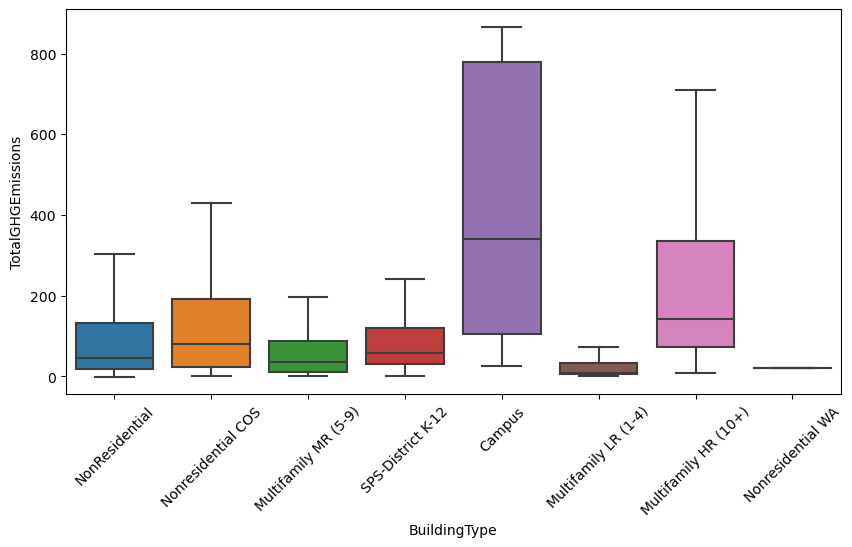

In [21]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data=df_building_NRJ_Bench,x='BuildingType',y='TotalGHGEmissions',showfliers=False)
plt.xticks(rotation=45);

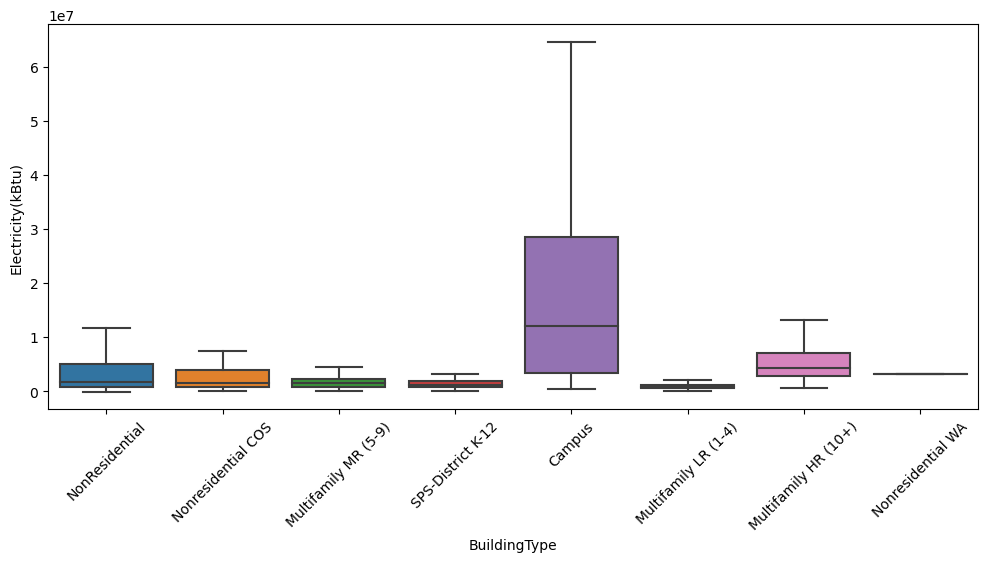

In [22]:
fig = plt.figure(figsize=(12, 5))
sns.boxplot(data=df_building_NRJ_Bench,x='BuildingType',y='Electricity(kBtu)',showfliers=False)
plt.xticks(rotation=45);

In [23]:
df_building_NRJ_Bench.PrimaryPropertyType.value_counts()

Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [24]:
cont = df_building_NRJ_Bench[['BuildingType','PrimaryPropertyType']]\
.pivot_table(index='PrimaryPropertyType',columns='BuildingType',aggfunc=len,margins=True,margins_name="Total")\
.fillna(0)
cont.style.background_gradient(cmap='Blues').format("{0:.0f}")

In [25]:
df_building_NRJ_Bench.PropertyName.sample(5)

OSEBuildingID
26075    Olive Terrace Apartments
20617       Seattle Habitat Store
491                   South Tower
654             AIRPORT WAY SOUTH
26951          MADISON VISTA APTS
Name: PropertyName, dtype: object

In [26]:
df_building_NRJ_Bench.Address.sample(5)

OSEBuildingID
20281    4105 Brooklyn Ave NE
23017       10564 5th Ave NE.
605       1700 Westlake Ave N
774               720 3RD AVE
170             801 E PINE ST
Name: Address, dtype: object

In [27]:
df_building_NRJ_Bench.Neighborhood.str.lower().value_counts()

downtown                  573
east                      453
magnolia / queen anne     423
greater duwamish          375
northeast                 280
lake union                251
northwest                 221
north                     187
southwest                 166
central                   134
ballard                   133
southeast                  95
delridge                   84
delridge neighborhoods      1
Name: Neighborhood, dtype: int64

Convertir les charactères en minuscule et fusionner delridge et delridge neighborhoods

In [28]:
df_building_NRJ_Bench['Neighborhood'] = df_building_NRJ_Bench.Neighborhood.str.lower()
df_building_NRJ_Bench.loc[df_building_NRJ_Bench.Neighborhood=='delridge neighborhoods','Neighborhood'] = 'delridge'

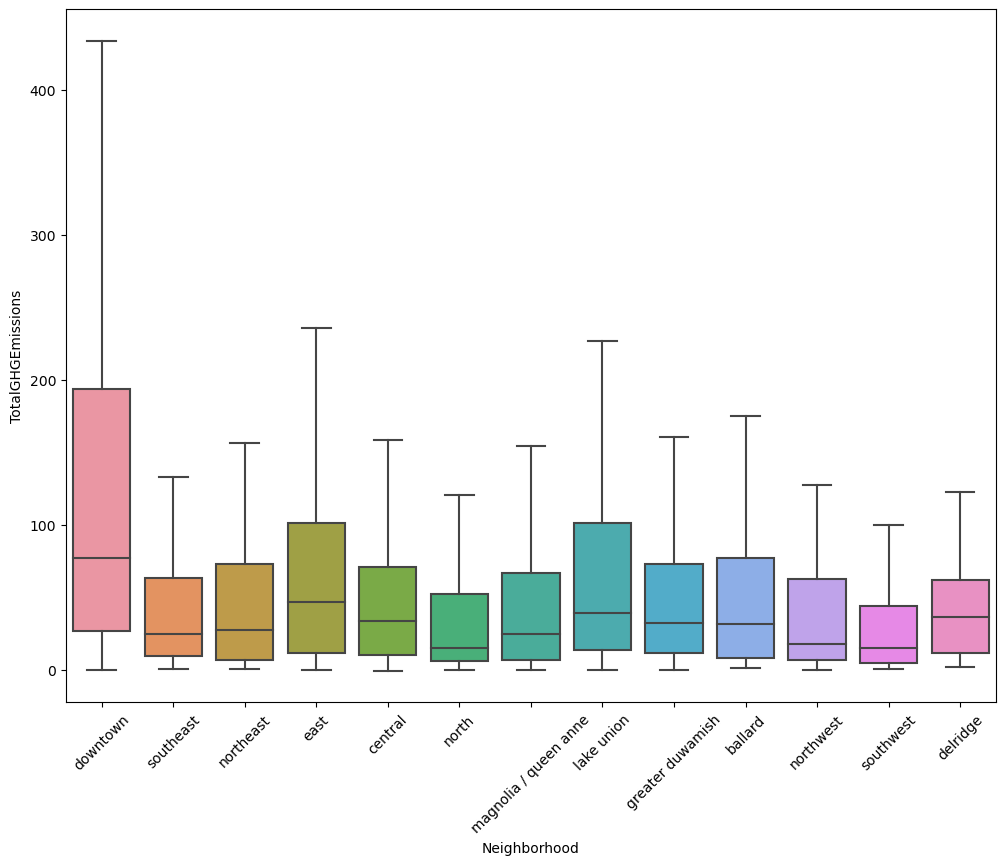

In [29]:
fig = plt.figure(figsize=(12, 9))
sns.boxplot(data=df_building_NRJ_Bench,x='Neighborhood',y='TotalGHGEmissions',showfliers=False)
plt.xticks(rotation=45);

In [30]:
df_building_NRJ_Bench.ListOfAllPropertyUseTypes.sample(5)

OSEBuildingID
235                                                       Hotel
471      Financial Office, Food Service, Office, Other, Parking
23166                                       Multifamily Housing
49722                              Multifamily Housing, Parking
29312                                       Multifamily Housing
Name: ListOfAllPropertyUseTypes, dtype: object

In [31]:
df_building_NRJ_Bench.LargestPropertyUseType.str.lower().value_counts().sort_index()

adult education                                            2
automobile dealership                                      5
bank branch                                                4
college/university                                        25
convention center                                          1
courthouse                                                 1
data center                                                3
distribution center                                       54
financial office                                           4
fire station                                               1
fitness center/health club/gym                             5
food service                                               1
hospital (general medical & surgical)                     10
hotel                                                     77
k-12 school                                              139
laboratory                                                13
library                 

In [32]:
df_building_NRJ_Bench.ComplianceStatus.value_counts()

Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

Ne garder que les lignes "compliant"???

In [33]:
df_building_NRJ_Bench = df_building_NRJ_Bench.loc[df_building_NRJ_Bench.ComplianceStatus=='Compliant']
df_building_NRJ_Bench.drop(columns = ["ComplianceStatus"],inplace = True)

In [34]:
df_building_NRJ_Bench.DefaultData.value_counts()

False    3211
Name: DefaultData, dtype: int64

In [35]:
#Drop colonne
df_building_NRJ_Bench.drop(columns = ["DefaultData"],inplace = True)

In [36]:
df_building_NRJ_Bench.select_dtypes(exclude=[np.number]).describe()

BuildingType   PrimaryPropertyType     PropertyName  \
count             3211                  3211             3211   
unique               8                    23             3198   
top     NonResidential  Low-Rise Multifamily  Northgate Plaza   
freq              1432                   956                3   

                  Address     City State ZipCode  \
count                3211     3211  3211    3198   
unique               3189        1     1      55   
top     2600 SW Barton St  Seattle    WA   98109   
freq                    4     3211  3211     291   

       TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood  \
count                           3211                3211         3211   
unique                          3107                   7           13   
top                       1625049001                   7     downtown   
freq                               8                1011          556   

       ListOfAllPropertyUseTypes LargestPropertyUseType  
count                       3207                   3196  
unique                       460                     55  
top          Multifamily Housing    Multifamily Housing  
freq                         841                   1626

In [37]:
# Les variables City et State sont constantes tjrs égal à la mm valeur respectivement Seattle et WA, on va les supprimer
# DefaultData et Outlier seront modifié car elles ne possèdent que 2 valeurs chacune

In [38]:
df_building_NRJ_Bench.drop(columns=['City','State'],inplace=True)

In [39]:
df_building_NRJ_Bench.select_dtypes(exclude=[np.number]).sample(5)

BuildingType   PrimaryPropertyType  \
OSEBuildingID                                               
25127          Multifamily MR (5-9)  Mid-Rise Multifamily   
26506          Multifamily LR (1-4)  Low-Rise Multifamily   
42067          Multifamily MR (5-9)    Mixed Use Property   
23342                NonResidential             Warehouse   
20263          Multifamily LR (1-4)  Low-Rise Multifamily   

                        PropertyName             Address ZipCode  \
OSEBuildingID                                                      
25127                 Lakeview Place  1004 Belmont Ave E   98102   
26506          Queen Anne Ocean View     2244 13th Ave W   98119   
42067              Broadway Building       1620 Broadway   98122   
23342              Daily Racing Form   12547 26th AVE NE   98165   
20263            Stanford Apartments    1304 NE 42nd St.   98105   

              TaxParcelIdentificationNumber CouncilDistrictCode  \
OSEBuildingID                                                     
25127                            8944100013                   3   
26506                            7014850000                   7   
42067                            6003000620                   3   
23342                            3834500415                   5   
20263                            1142001090                   4   

                        Neighborhood  \
OSEBuildingID                          
25127                           east   
26506          magnolia / queen anne   
42067                           east   
23342                          north   
20263                      northeast   

                                                                  ListOfAllPropertyUseTypes  \
OSEBuildingID                                                                                 
25127                                                          Multifamily Housing, Parking   
26506                                                                   Multifamily Housing   
42067          Multifamily Housing, Office, Parking, Residence Hall/Dormitory, Retail Store   
23342                                                            Non-Refrigerated Warehouse   
20263                                                                   Multifamily Housing   

                   LargestPropertyUseType  
OSEBuildingID                              
25127                 Multifamily Housing  
26506                 Multifamily Housing  
42067                 Multifamily Housing  
23342          Non-Refrigerated Warehouse  
20263                 Multifamily Housing

</br>

Représentation de la longitude et la latitudes

''

<Figure size 600x1600 with 0 Axes>

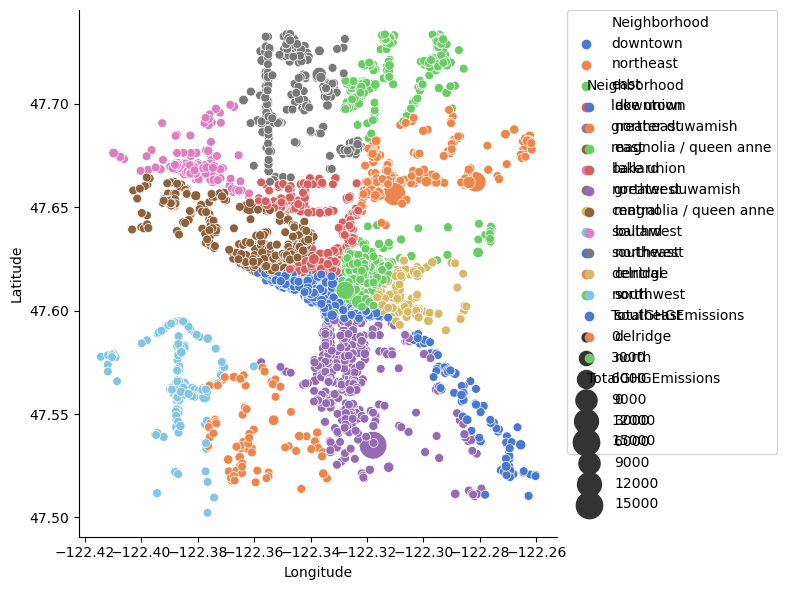

In [40]:
plt.figure(figsize=(6,16))
sns.relplot(x="Longitude", y="Latitude", hue="Neighborhood", size="TotalGHGEmissions",
            sizes=(40, 400), alpha=1, palette="muted",
            height=6, data=df_building_NRJ_Bench)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
;


Representation des concilDistrictCode sur le graph

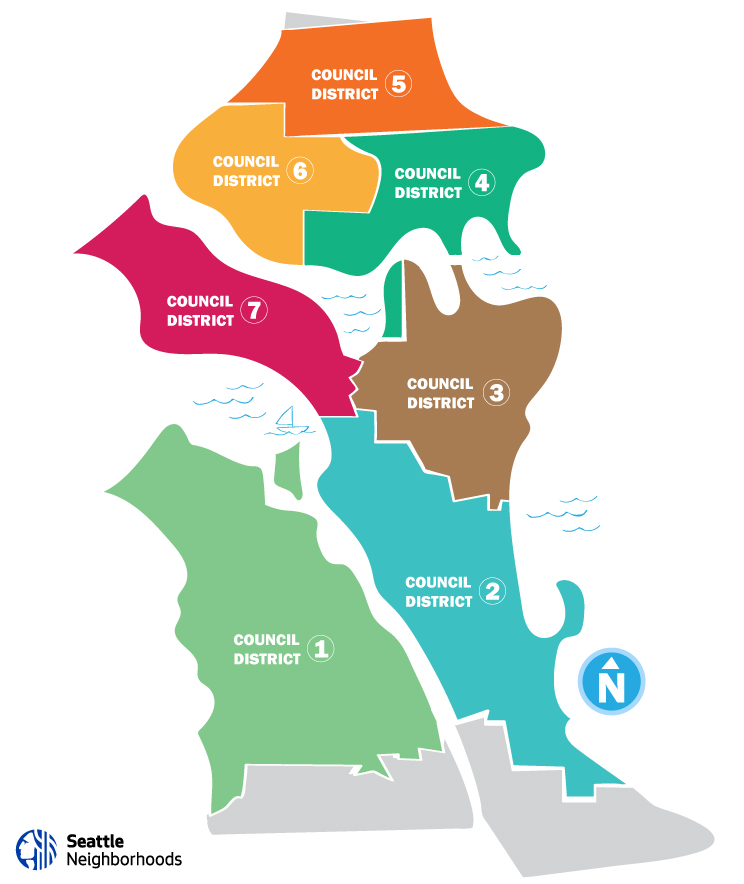

In [42]:
import plotly.express as px

color_scale = [(0, 'orange'), (1,'red')]
df_out = df_building_NRJ_Bench[df_building_NRJ_Bench['TotalGHGEmissions'].notna()].dropna(axis='columns')

from sklearn.preprocessing import StandardScaler
elect_scalMM = (df_out['TotalGHGEmissions'] - df_out['TotalGHGEmissions'].mean(axis=0)) / (df_out['TotalGHGEmissions'].std(axis=0))
fig = px.scatter_mapbox(df_out, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Address", 
                        hover_data=["Address", "TotalGHGEmissions"],
                        color="TotalGHGEmissions",
                        color_continuous_scale=color_scale,
                        size=elect_scalMM+1,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Preparation des données

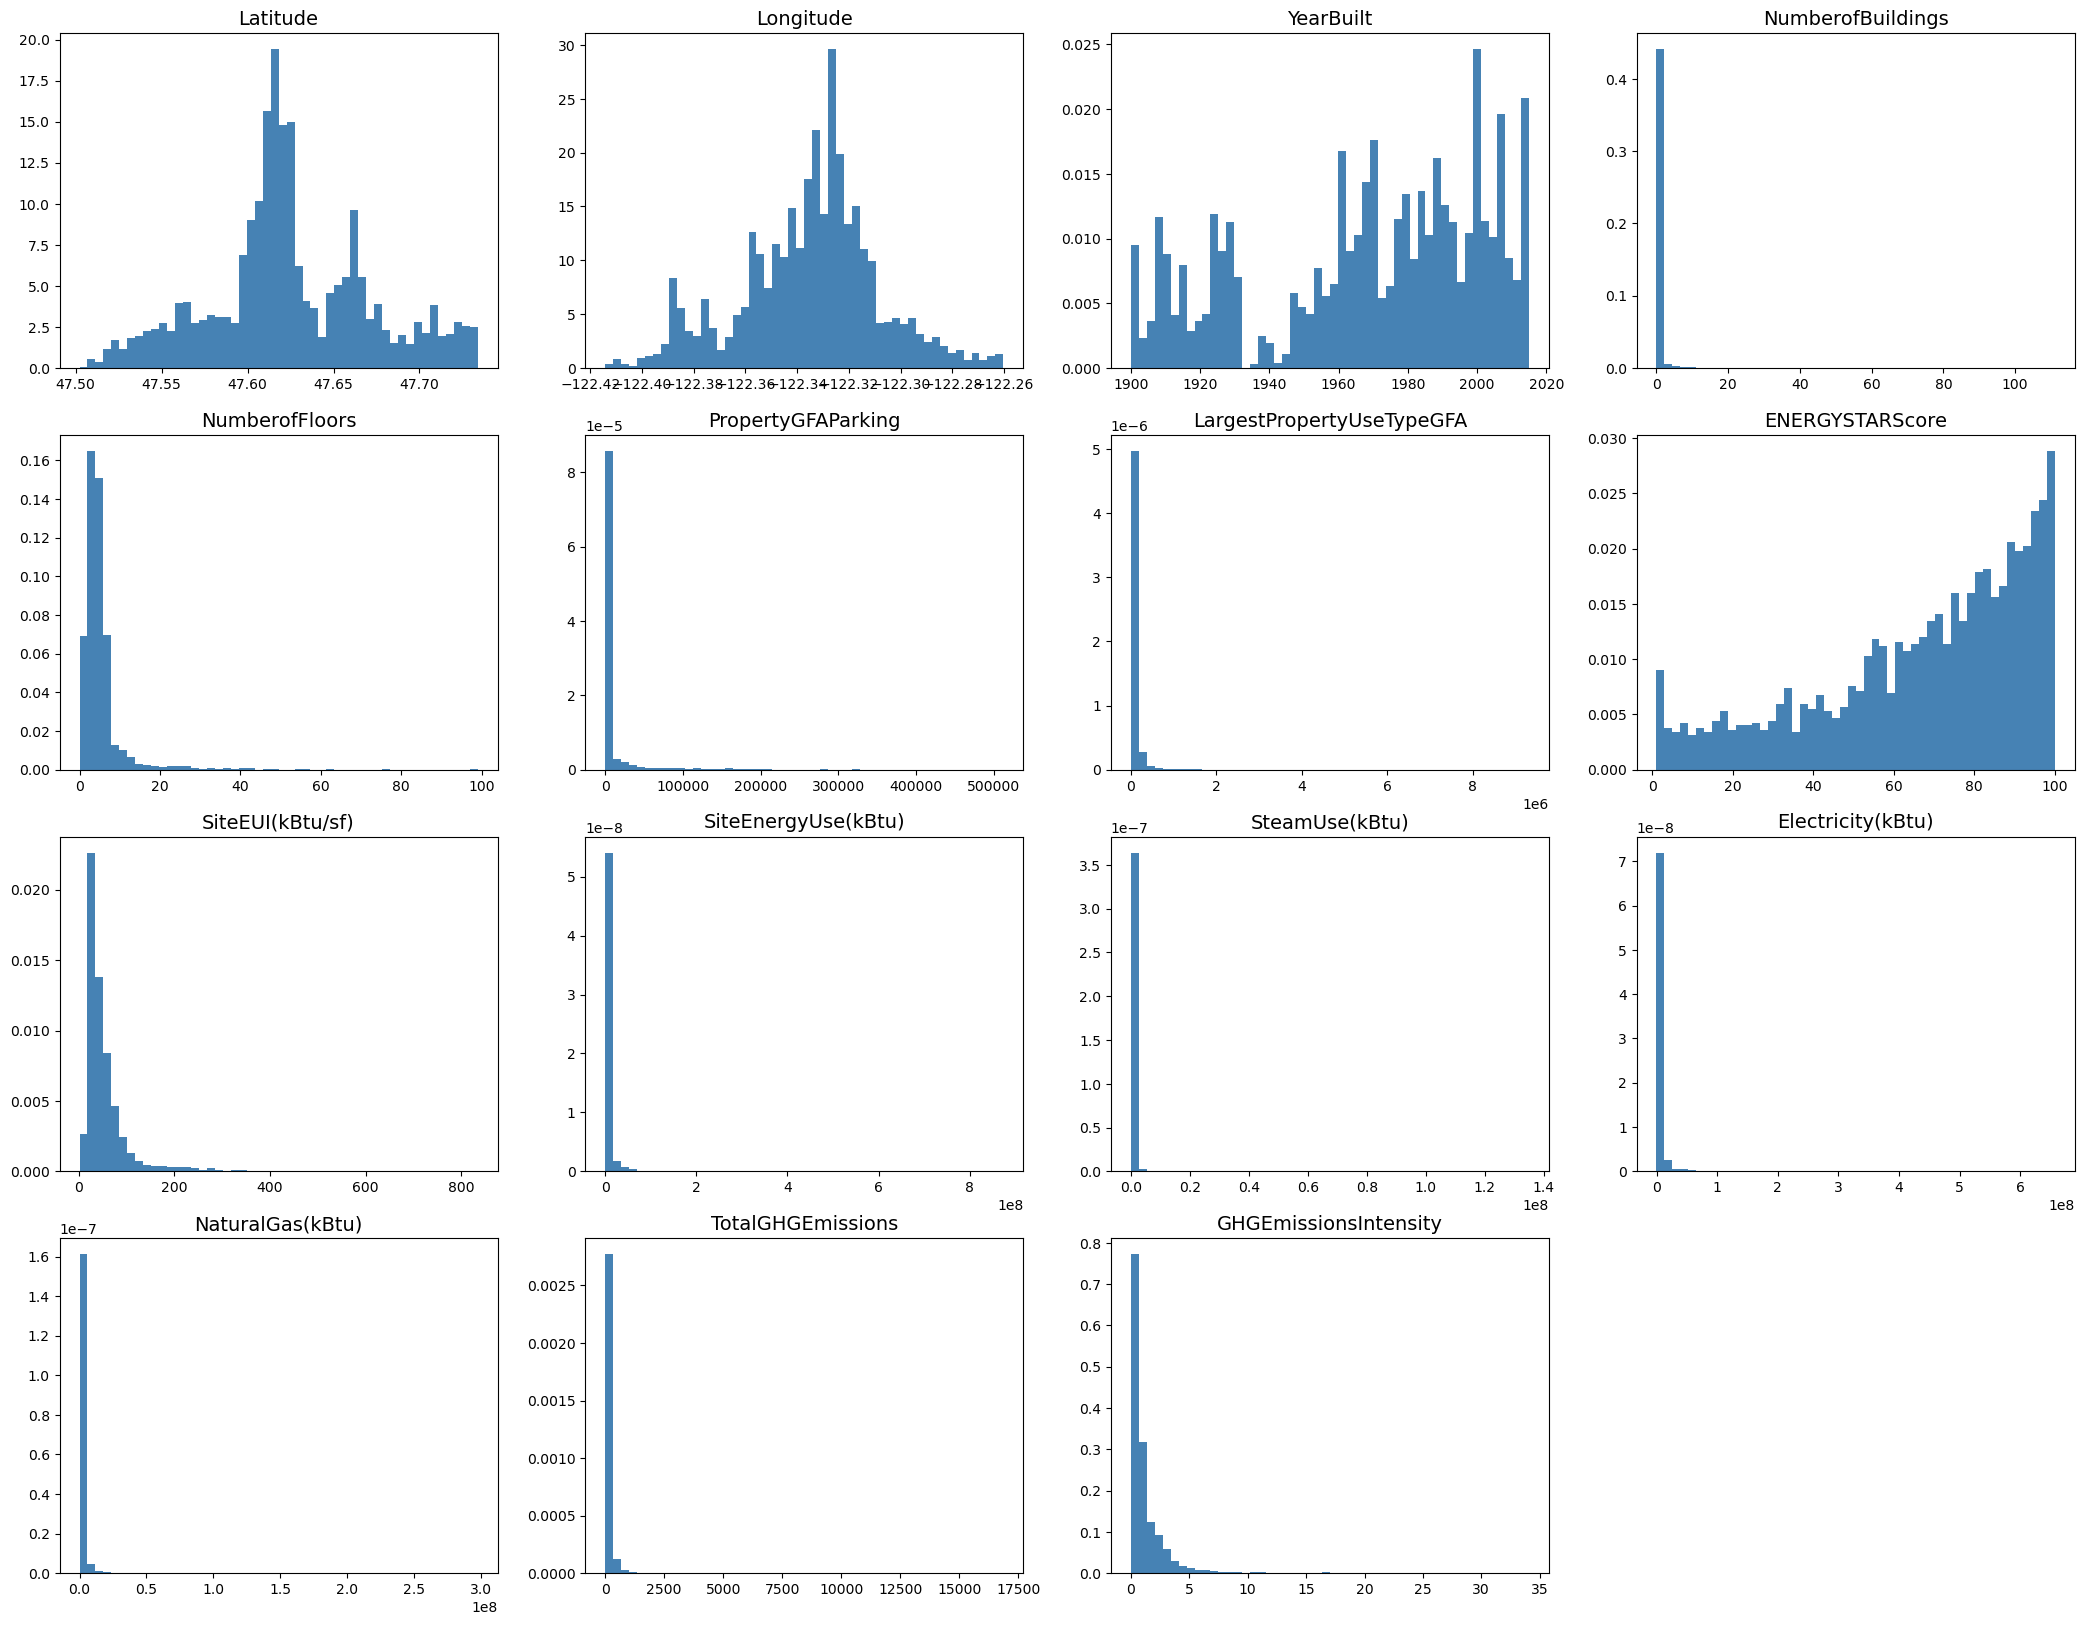

In [43]:
fig = plt.figure(figsize=(26, 20))
X_g = df_building_NRJ_Bench.select_dtypes(include=np.number)
for feat_idx in range(X_g.shape[1]):
    ax = fig.add_subplot(4,4, (feat_idx+1))
    h = ax.hist(X_g.iloc[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(X_g.columns[feat_idx], fontsize=14)
    
del X_g

Analyse des variables target

C:\Users\eleor\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log1p



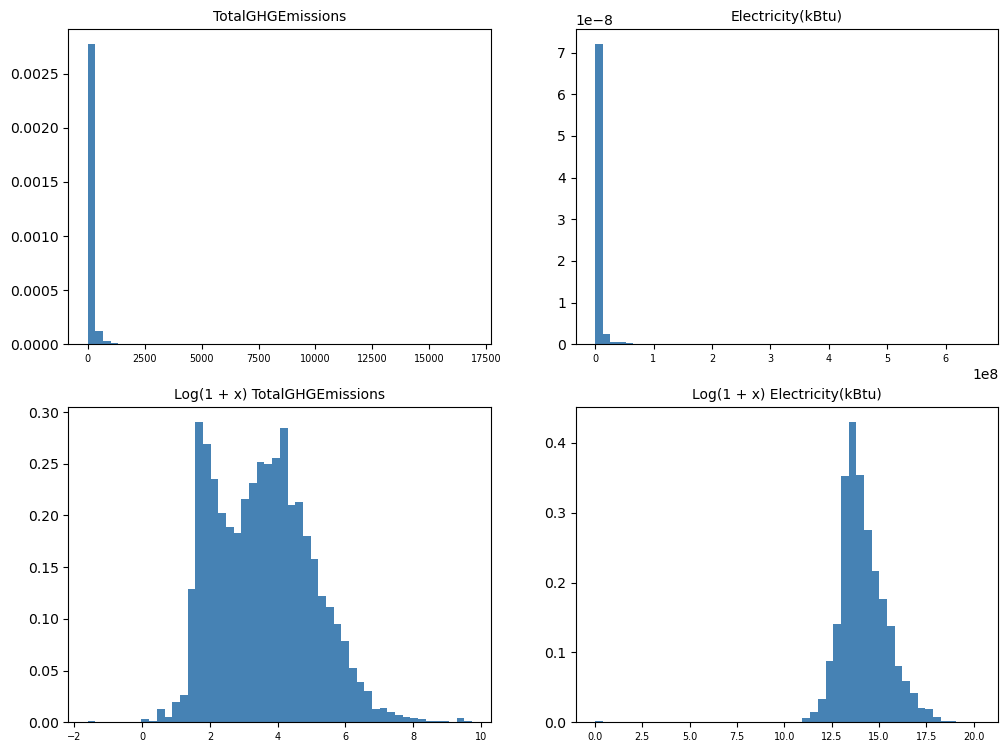

In [44]:
fig = plt.figure(figsize=(12, 9))

for idx,feat in enumerate(['TotalGHGEmissions','Electricity(kBtu)']):
    for i,tr in enumerate(['raw','log']):
        if tr == 'raw':
            ax = fig.add_subplot(2,2, (idx+i+1))
            h = ax.hist(df_building_NRJ_Bench[feat], bins=50, color='steelblue', density=True, edgecolor='none')
            ax.set_title(feat, fontsize=10)
            ax.xaxis.set_tick_params(labelsize=7)
        else:
            ax = fig.add_subplot(2,2, (idx+i+2))
            h = ax.hist(np.log1p(df_building_NRJ_Bench[feat]), bins=50, color='steelblue', density=True, edgecolor='none')
            ax.set_title('Log(1 + x) '+feat, fontsize=10)
            ax.xaxis.set_tick_params(labelsize=7)
            

<AxesSubplot:xlabel='NumberofBuildings', ylabel='Count'>

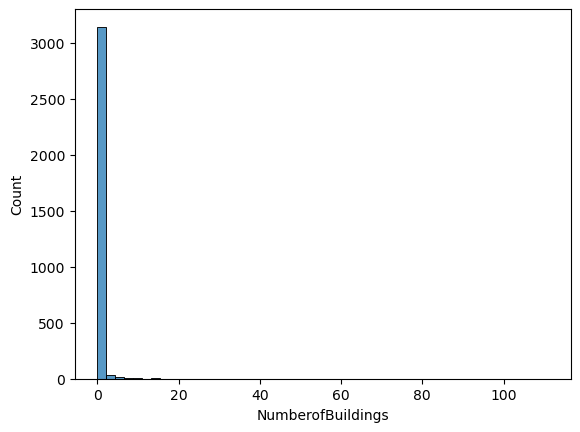

In [45]:
sns.histplot(df_building_NRJ_Bench.NumberofBuildings,bins=50)

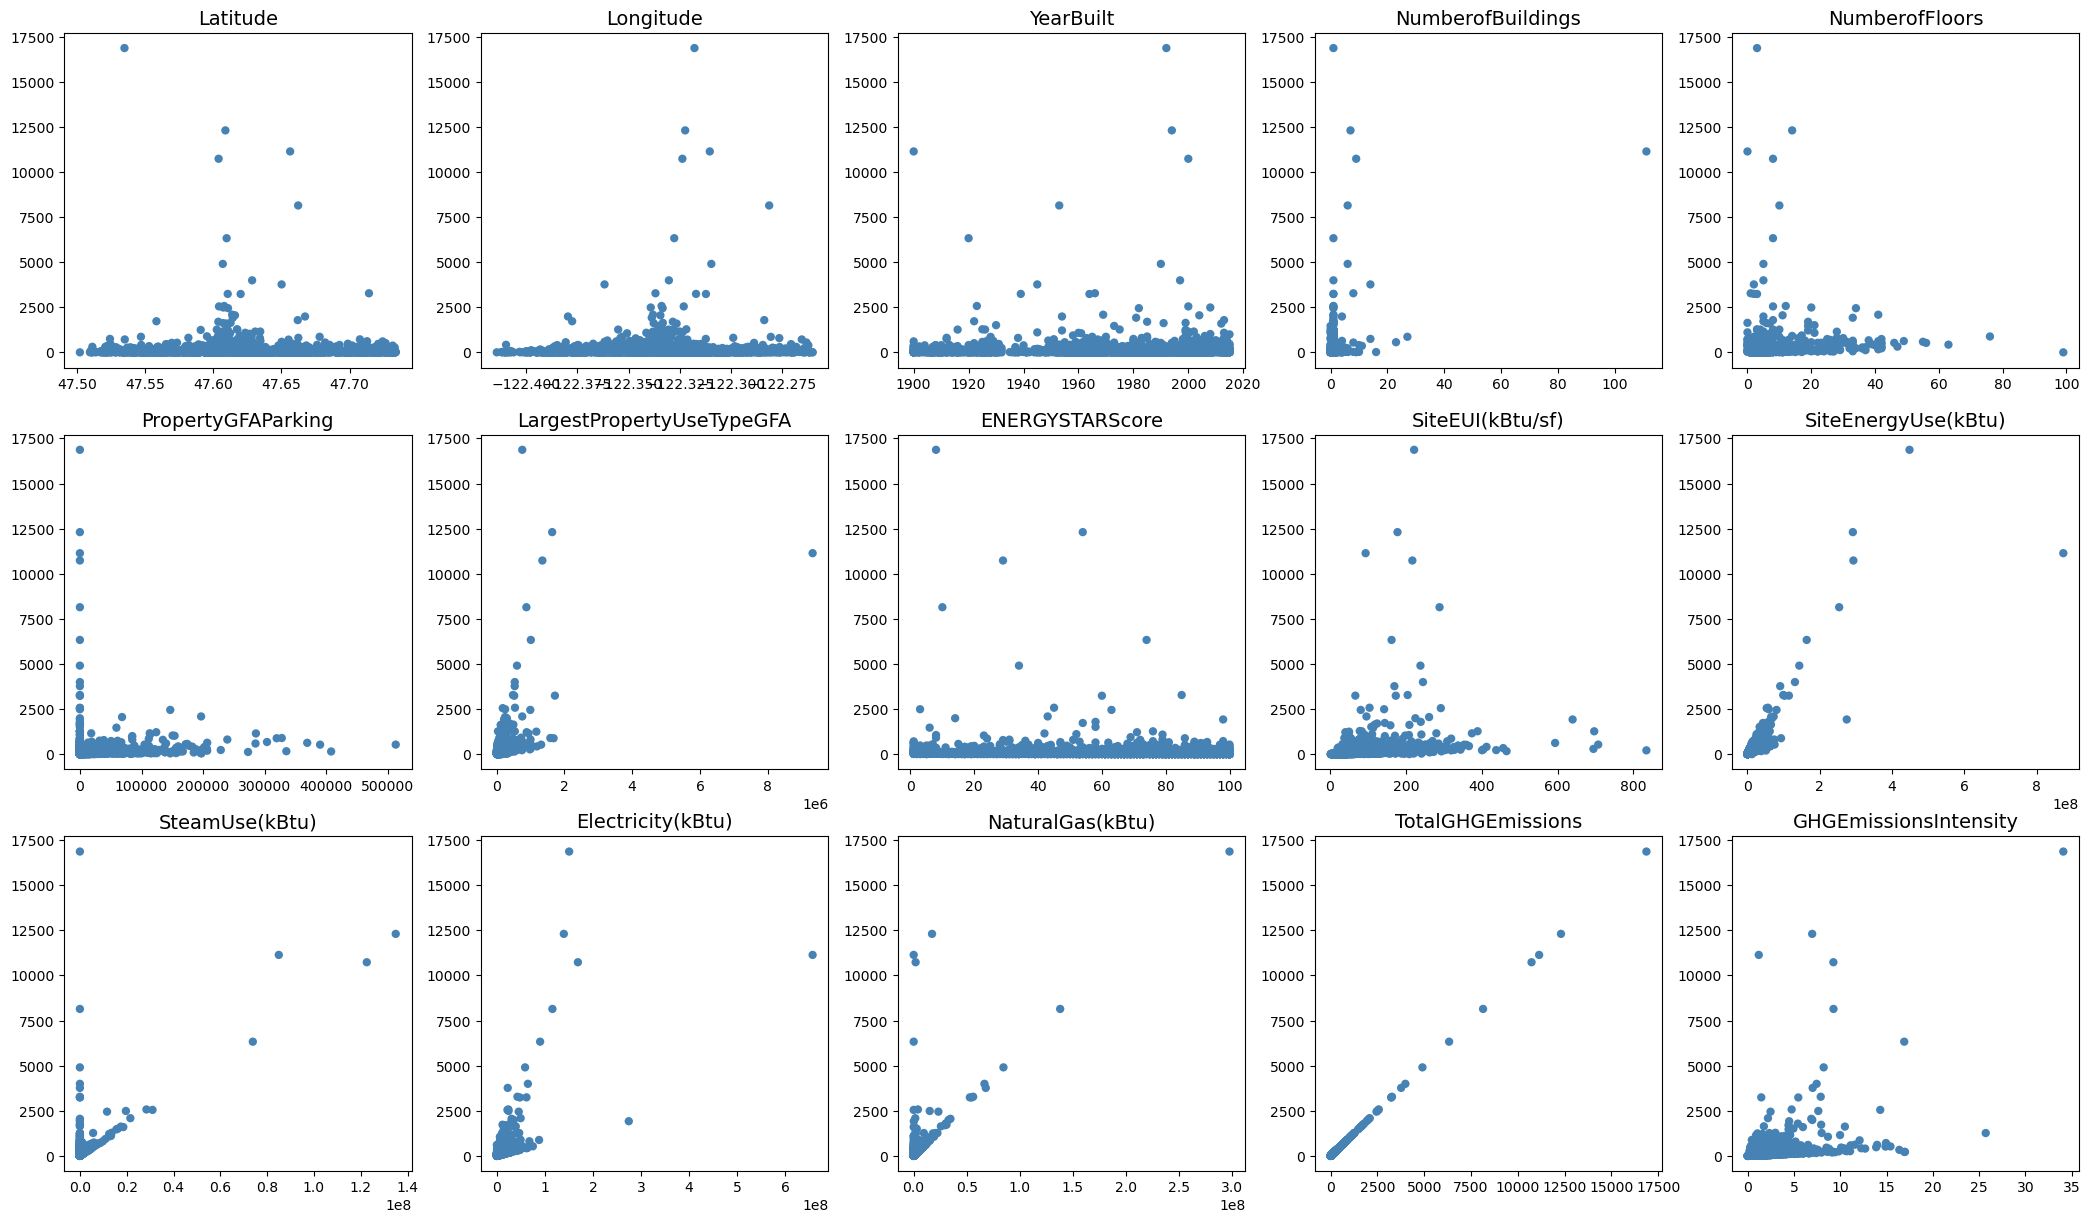

In [46]:
fig = plt.figure(figsize=(26, 20))
X_g = df_building_NRJ_Bench.select_dtypes(include=np.number)
for feat_idx in range(X_g.shape[1]):
        ax = fig.add_subplot(4,5, (feat_idx+1))
        h = ax.scatter(X_g.iloc[:, feat_idx],y=X_g.TotalGHGEmissions, color='steelblue', edgecolor='none')
        ax.set_title(X_g.columns[feat_idx], fontsize=14)

del X_g

In [47]:
df_building_NRJ_Bench.corr()[['TotalGHGEmissions','Electricity(kBtu)']].sort_values('TotalGHGEmissions')\
.style.background_gradient(cmap='Blues')

In [48]:
def df_quickdirtyCO2(df):
    dfc = df.dropna(subset=['TotalGHGEmissions','SiteEnergyUse(kBtu)']).copy()
    y = np.log1p(dfc.TotalGHGEmissions.values.reshape(-1, 1)) #.Electricity(kBtu).values
    X = dfc['SiteEnergyUse(kBtu)'].values.reshape(-1, 1)
    return X,y

In [49]:
def create_df_raiseCO2(df):
    dfc = df.copy()
    #np.log1p ==> Calculates log(1 + x)
    y = np.log1p(dfc.TotalGHGEmissions.values.reshape(-1, 1)) 
    #.Electricity(kBtu).values 
    
    X = dfc[['SiteEnergyUse(kBtu)','NumberofBuildings','NumberofFloors','YearBuilt','NaturalGas(kBtu)']]
    X['Age'] = 2016-dfc.YearBuilt
    X.drop(columns=['YearBuilt'],inplace=True)
    return X.values,y

In [50]:
X, y = df_quickdirtyCO2(df_building_NRJ_Bench)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
y.shape,X.shape

((3207, 1), (3207, 1))

In [51]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

# centrage reduction
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Score à battre

In [52]:
from sklearn import metrics
def calcul_metric(ytest,ypred,label=''):
    lb = label.ljust(10,' ')
    m1 = "| RMSE: {:.2f}".format(np.sqrt( metrics.mean_squared_error(ytest, ypred) )).ljust(16,' ')
    m2 = "|R²: {:.2f}".format(metrics.r2_score(ytest, ypred)).ljust(16,' ')              
    print(lb+m1+m2)

In [53]:
from sklearn import dummy
from sklearn import metrics
from sklearn.model_selection import cross_val_score

dumMean = dummy.DummyRegressor(strategy='mean')
dumMedian = dummy.DummyRegressor(strategy='median')

# Entraînement
dumMean.fit(X_train_scaled, y_train)
dumMedian.fit(X_train_scaled, y_train)

# Prédiction sur le jeu de test
y_pred_dumMean = dumMean.predict(X_test_scaled)
y_pred_dumMedian = dumMedian.predict(X_test_scaled)
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)

# CV
print(round(cross_val_score(dumMean,X_train_scaled, y_train,cv=10,scoring="neg_mean_squared_error").mean(),2))
print(round(cross_val_score(dumMedian,X_train_scaled, y_train,cv=10,scoring="neg_mean_squared_error").mean(),2))


# Evaluate
#print("RMSE Mean : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dumMean)) ))
#print("RMSE Median : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dumMedian)) ))
#print("RMSE Random : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)) ))

calcul_metric(y_test,y_pred_dumMean,label='Naif Mean  ')
calcul_metric(y_test,y_pred_dumMedian,label='Naif Median')
calcul_metric(y_test,y_pred_random,label='Naif Random')

-1.99
-1.99
Naif Mean  | RMSE: 1.45    |R²: -0.00      
Naif Median| RMSE: 1.45    |R²: -0.01      
Naif Random| RMSE: 3.27    |R²: -4.10      


### Modelisation

#### CO2

In [54]:
from sklearn import linear_model
regCO2 = linear_model.LinearRegression()
regCO2.fit(X_train_scaled, y_train)
y_predregCO2 = regCO2.predict(X_test_scaled)
#print("RMSE Reg: {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_predregCO2) )))
calcul_metric(y_test, y_predregCO2,label='Reg MCO')

from sklearn import neighbors
knnCO2 = neighbors.KNeighborsRegressor(n_neighbors=11)
knnCO2.fit(X_train_scaled, y_train)
y_predknnCO2 = knnCO2.predict(X_test_scaled)
#print("RMSE Knn: {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_predknnCO2) )))
calcul_metric(y_test, y_predknnCO2,label='Knn')


from sklearn import svm
svmrCO2 = svm.SVR()
svmrCO2.fit(X_train_scaled, y_train.ravel())
y_predsvmrCO2 = svmrCO2.predict(X_test_scaled)
#print("RMSE SVMr: {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_predsvmrCO2) )))
calcul_metric(y_test, y_predsvmrCO2,label='SVMr')


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30,100], 'max_features': [1,2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10,100], 'max_features': [2, 3, 4]},
]
forest_regCO2 = RandomForestRegressor()
grid_searchCO2 = GridSearchCV(forest_regCO2, param_grid, cv=5,
                              scoring='neg_mean_squared_error',
                              return_train_score=True)
grid_searchCO2.fit(X_train_scaled, y_train.ravel())
print(grid_searchCO2.best_params_)
y_predforest_regCO2 = grid_searchCO2.predict(X_test_scaled)
calcul_metric(y_test, y_predforest_regCO2,label='RFr')

Reg MCO   | RMSE: 1.53    |R²: -0.11      
Knn       | RMSE: 0.68    |R²: 0.78       
SVMr      | RMSE: 0.78    |R²: 0.71       
{'max_features': 8, 'n_estimators': 30}
RFr       | RMSE: 0.79    |R²: 0.70       


</br>

In [55]:
forest_regCO2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}